In [1]:
import numpy as np
import torch.nn as nn
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision import transforms, models, datasets
import torch.optim as optim
import time
import copy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset
from torch.autograd import Variable
from collections import Counter
from sklearn.metrics import confusion_matrix
import pandas as pd
import itertools
from sklearn.preprocessing import LabelEncoder

In [2]:
transform = transforms.Compose([
    transforms.Resize(256),        # Resize the image to 256x256 pixels
    transforms.CenterCrop(224),   # Crop the center 224x224 pixels
    transforms.ToTensor()        # Convert the image to a PyTorch tensor
])
batch_size = 128
data_dir = '~/Desktop/6895/pictures/'
dataset = datasets.ImageFolder(data_dir, transform=transform)
# train_dataset = datasets.ImageFolder('~/Desktop/6895/Images/train/', transform=transform)
# valid_dataset = datasets.ImageFolder('~/Desktop/6895/Images/validation/', transform=transform)
total_count = len(dataset)
train_count = int(0.7 * total_count) 
valid_count = total_count - train_count 
train_dataset, valid_dataset = torch.utils.data.random_split(dataset=dataset, lengths=[train_count, valid_count])
train_dataset_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle = True)  
valid_dataset_loader = torch.utils.data.DataLoader(valid_dataset, batch_size = batch_size, shuffle = False) 
dataloaders = {'train': train_dataset_loader, 'valid': valid_dataset_loader}

In [3]:
def train_model(model, dataloaders, criterion, optimizer,device, num_epochs=50):
    since = time.time()
    best_acc = 0
    model.to(device)

    val_acc_history = []
    train_acc_history = []
    test_acc_history = []
    train_losses = []
    valid_losses = []
    test_losses = []

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()  
            else:
                model.eval()   

            running_loss = 0.0
            running_corrects = 0

          
            for inputs, labels in dataloaders[phase]:
                #print(inputs.shape)
                inputs = inputs.to(device)
                labels = labels.to(device)

           
                optimizer.zero_grad()
            
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    _, preds = torch.max(outputs, 1)
               
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects / len(dataloaders[phase].dataset)
            
            
            time_elapsed = time.time() - since
   
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
            
            if phase == 'valid':
                val_acc_history.append(epoch_acc)
                valid_losses.append(epoch_loss)

            if phase == 'train':
                train_acc_history.append(epoch_acc)
                train_losses.append(epoch_loss)
            


    return model, val_acc_history, train_acc_history,valid_losses, train_losses


# define plot accuracy and loss
def plot_acc_loss(val_acc_history, train_acc_history,valid_losses, train_losses):
    val_acc=[]
    for i in val_acc_history:
        val_acc.append(i.cpu().data.numpy())
    train_acc=[]
    for i in train_acc_history:
        train_acc.append(i.cpu().data.numpy())
    test_acc=[]

  
    plt.subplot(1,2,1)
    plt.plot(range(len(val_acc)),val_acc,label='val_acc')
    plt.plot(range(len(train_acc)),train_acc,label='train_acc')
    plt.xlabel('epoch')
    plt.ylabel('acc')
    plt.legend()


    plt.subplot(1,2,2)
    plt.plot(range(len(valid_losses)),valid_losses,label='val_loss')
    plt.plot(range(len(train_losses)),train_losses,label='train_loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

/Users/ryan_huang/Library/Python/3.9/lib/python/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/ryan_huang/Library/Python/3.9/lib/python/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 0/99
----------
train Loss: 3.0313 Acc: 0.0976
valid Loss: 2.7636 Acc: 0.2470
Epoch 1/99
----------
train Loss: 2.6074 Acc: 0.2411
valid Loss: 2.4390 Acc: 0.3316
Epoch 2/99
----------
train Loss: 2.3117 Acc: 0.3387
valid Loss: 2.2154 Acc: 0.3669
Epoch 3/99
----------
train Loss: 2.0834 Acc: 0.3934
valid Loss: 2.0487 Acc: 0.3916
Epoch 4/99
----------
train Loss: 1.8941 Acc: 0.4293
valid Loss: 1.9221 Acc: 0.4128
Epoch 5/99
----------
train Loss: 1.7331 Acc: 0.4799
valid Loss: 1.8266 Acc: 0.4365
Epoch 6/99
----------
train Loss: 1.5957 Acc: 0.5131
valid Loss: 1.7541 Acc: 0.4529
Epoch 7/99
----------
train Loss: 1.4560 Acc: 0.5589
valid Loss: 1.7039 Acc: 0.4644
Epoch 8/99
----------
train Loss: 1.3282 Acc: 0.6073
valid Loss: 1.6617 Acc: 0.4708
Epoch 9/99
----------
train Loss: 1.2043 Acc: 0.6495
valid Loss: 1.6300 Acc: 0.4804
Epoch 10/99
----------
train Loss: 1.0841 Acc: 0.6975
valid Loss: 1.6071 Acc: 0.4945
Epoch 11/99
----------
train Loss: 0.9651 Acc: 0.7364
valid Loss: 1.5937 Ac

valid Loss: 2.0444 Acc: 0.5103
Epoch 97/99
----------
train Loss: 0.0335 Acc: 0.9796
valid Loss: 2.0416 Acc: 0.5103
Epoch 98/99
----------
train Loss: 0.0335 Acc: 0.9802
valid Loss: 2.0639 Acc: 0.5071
Epoch 99/99
----------
train Loss: 0.0334 Acc: 0.9801
valid Loss: 2.0496 Acc: 0.5051


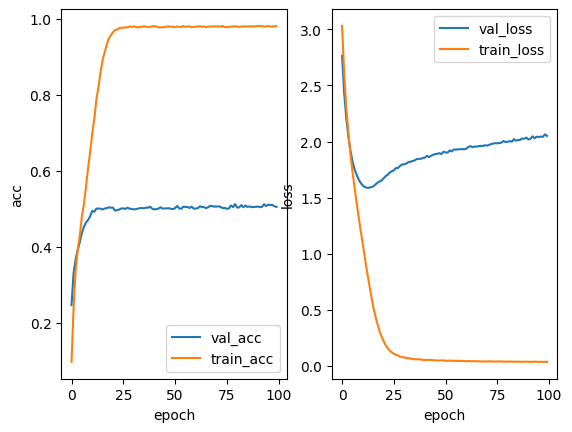

In [4]:
model = models.resnet50(pretrained = True) # Use the resnet18 model
num_ftrs = model.fc.in_features # Modify the number of model categories
model.fc = nn.Sequential(nn.Dropout(0.5), nn.Linear(num_ftrs, 24))


device = torch.device('mps')
cost_fun = nn.CrossEntropyLoss().to(device) 
optimizer = torch.optim.Adam(model.parameters(),lr=1e-5) 
model = model.to(device = 'mps', dtype = torch.float32)
model, val_acc_history, train_acc_history,valid_losses, train_losses = train_model(model, dataloaders, cost_fun, optimizer, device,num_epochs=100)
plot_acc_loss(val_acc_history, train_acc_history,valid_losses, train_losses)